In [26]:
#i try to use the standard tf way to create a model,then i try to create a custom one with a custom training loop (the networks are the same,so i should expect the same result)
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

!pip install pyDOE

2.13.0


In [27]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

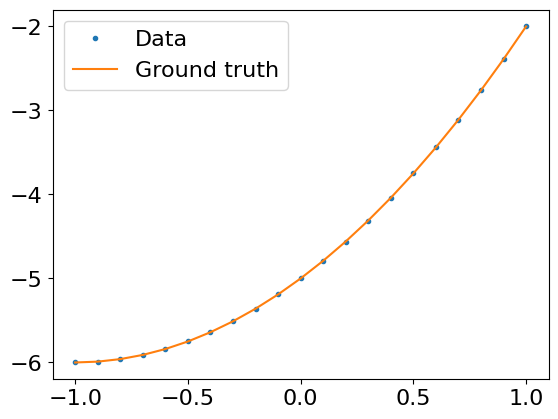

In [58]:
epochs=500
input_shape=(1,)
seed=42
n_points=21
x = tf.linspace(-1, 1, n_points)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[n_points])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)


In [81]:
def build_model_conv1D(input_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
 
    #kernel_regularizer=regularizers.L2(0.1)
    # Classifier
    x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
    x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
    output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(),optimizer=tfk.optimizers.Adam(0.001))

    # Return the model
    return model

In [82]:
model = build_model_conv1D(input_shape)

In [83]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_36 (Dense)            (None, 16)                32        
                                                                 
 dense_37 (Dense)            (None, 64)                1088      
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
history=model.fit(
    x = x,
    y = y,
    epochs = epochs,
    batch_size=21
    ).history

Epoch 1/1000
1/1 [==============================] - 0s 375ms/step - loss: 23.0643
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.9204
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 22.7824
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 22.6490
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.5178
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.3877
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 22.2612
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.1360
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.0058
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 21.8720
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 21.7348
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.5930
Epoch 13/1000
1/1 [================

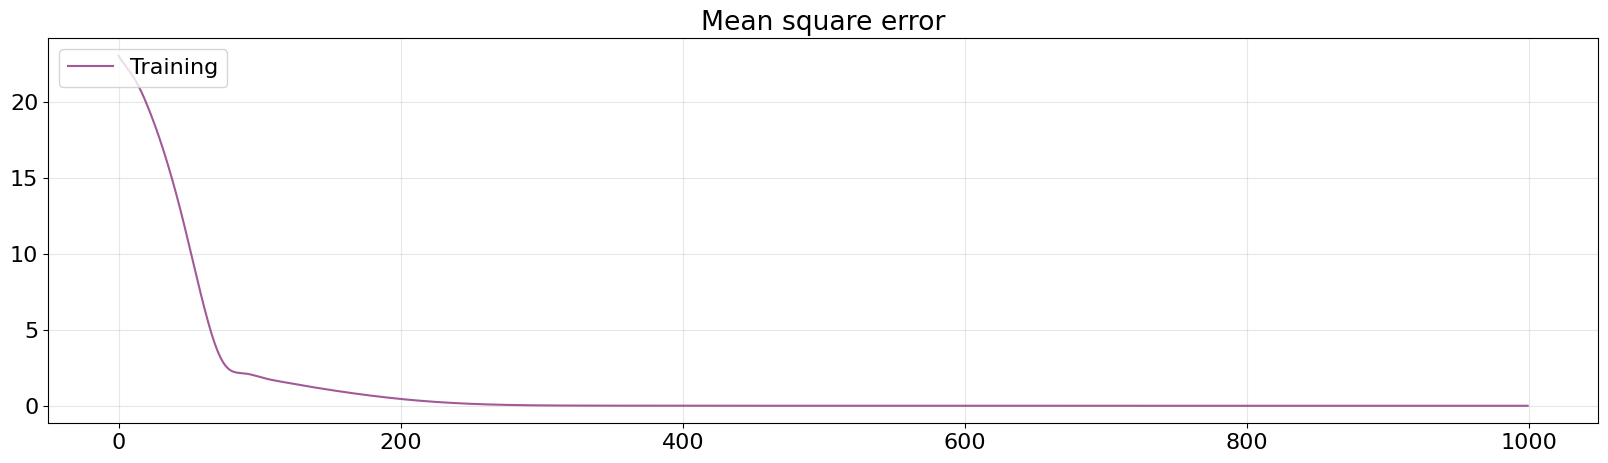

In [85]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)
plt.savefig('loss.png')

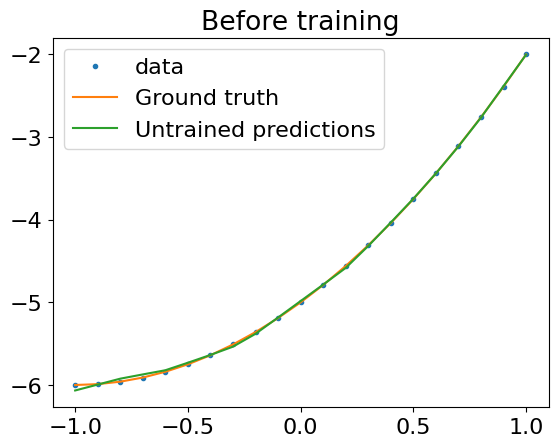

In [86]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [87]:
input_layer = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)


In [88]:
input_shape=(1,)
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_40 (Dense)            (None, 16)                32        
                                                                 
 dense_41 (Dense)            (None, 64)                1088      
                                                                 
 dense_42 (Dense)            (None, 16)                1040      
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


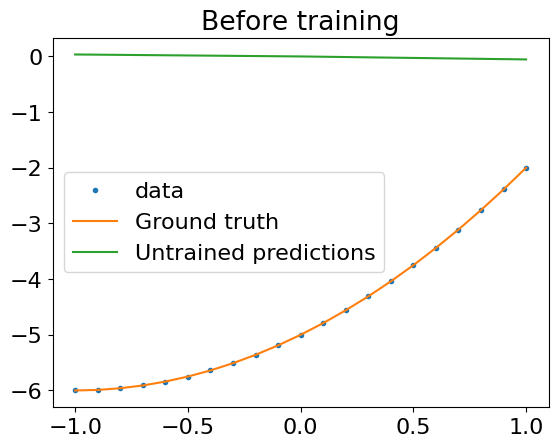

In [89]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [91]:
epochs=1000
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        tape.watch(model.trainable_variables)
        predictions = model(x)
        loss = tf.reduce_mean(tf.square(y - predictions))
    
    # Calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # Update model weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Print training loss for this epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")



Epoch 10/1000, Loss: 4.051832675933838
Epoch 20/1000, Loss: 3.1305086612701416
Epoch 30/1000, Loss: 2.630373477935791
Epoch 40/1000, Loss: 2.4490745067596436
Epoch 50/1000, Loss: 2.291337013244629
Epoch 60/1000, Loss: 2.1371514797210693
Epoch 70/1000, Loss: 2.009699583053589
Epoch 80/1000, Loss: 1.8994054794311523
Epoch 90/1000, Loss: 1.8081146478652954
Epoch 100/1000, Loss: 1.7364375591278076
Epoch 110/1000, Loss: 1.6824222803115845
Epoch 120/1000, Loss: 1.6453040838241577
Epoch 130/1000, Loss: 1.6220290660858154
Epoch 140/1000, Loss: 1.6082029342651367
Epoch 150/1000, Loss: 1.6002532243728638
Epoch 160/1000, Loss: 1.5955156087875366
Epoch 170/1000, Loss: 1.5922160148620605
Epoch 180/1000, Loss: 1.5898220539093018
Epoch 190/1000, Loss: 1.587849497795105
Epoch 200/1000, Loss: 1.5859111547470093
Epoch 210/1000, Loss: 1.5840096473693848
Epoch 220/1000, Loss: 1.5822604894638062
Epoch 230/1000, Loss: 1.5807381868362427
Epoch 240/1000, Loss: 1.5794306993484497
Epoch 250/1000, Loss: 1.578324

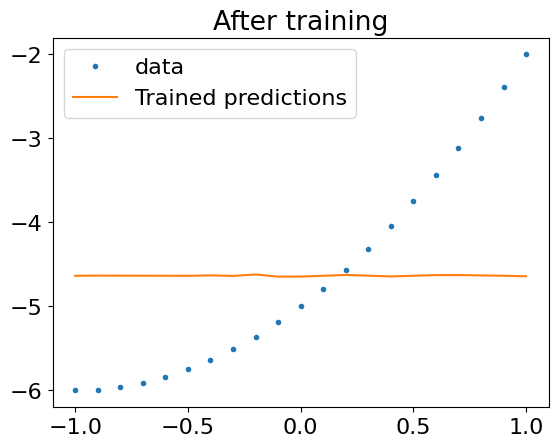

In [92]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x_), label='Trained predictions')
plt.title('After training')
plt.legend();